# Superstore Dataset
## Context
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Go crazy with the dataset, but also make sure to provide some business insights to improve.

## Metadata
Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option("display.max_columns", None)

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Import data

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding_errors = "ignore")

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Drop redundant columns, rename columns 

In [6]:
df = df.drop(columns = ["Row ID", "Customer Name"])

In [7]:
df = df.rename({"Order ID": "Order_ID", 
               "Order Date": "Order_Date",
               "Ship Date": "Ship_Date",
                "Ship Mode": "Ship_Mode",
                "Customer ID" : "Customer_ID",
                "Postal Code": "Postal_Code",
                "Product ID": "Product_ID",
                "Sub-Category": "Sub_Category",
                "Product Name": "Product_Name"
               },axis = 1)

## Check missing value

In [8]:
df.isnull().sum()

Order_ID        0
Order_Date      0
Ship_Date       0
Ship_Mode       0
Customer_ID     0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Product_ID      0
Category        0
Sub_Category    0
Product_Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- No missing values.

## Split date into year & month

In [9]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"])
df["Order_Year"] = df["Order_Date"].dt.year.astype("category")
df["Order_Month"] = df["Order_Date"].dt.month.astype("category")

## Create Days_To_Ship and Profit_Margin

In [10]:
df["Days_To_Ship"] = (df["Ship_Date"] - df["Order_Date"]).astype('timedelta64[D]').astype("int")

In [11]:
df["Profit_Margin"] = np.round(df.Profit / df.Sales, 2)

## Check number of unique values in categorical columns

In [12]:
for col in df.select_dtypes("object").columns:
    print(col, ":", df[col].nunique())

Order_ID : 5009
Ship_Mode : 4
Customer_ID : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product_ID : 1862
Category : 3
Sub_Category : 17
Product_Name : 1850


- The dataset involves 5009 orders, 793 customers and 1850 products.

In [13]:
df.Country.unique()

array(['United States'], dtype=object)

- Data are from United States, covering 49 states, 531 cities.

In [14]:
df = df.drop(columns = "Country")

In [15]:
for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype("category")

In [16]:
df.Postal_Code = df.Postal_Code.astype("category")

## Data summary

In [17]:
df.describe()

Sales     Quantity     Discount       Profit  Days_To_Ship  \
count   9994.000000  9994.000000  9994.000000  9994.000000   9994.000000   
mean     229.858001     3.789574     0.156203    28.656896      3.958175   
std      623.245101     2.225110     0.206452   234.260108      1.747567   
min        0.444000     1.000000     0.000000 -6599.978000      0.000000   
25%       17.280000     2.000000     0.000000     1.728750      3.000000   
50%       54.490000     3.000000     0.200000     8.666500      4.000000   
75%      209.940000     5.000000     0.200000    29.364000      5.000000   
max    22638.480000    14.000000     0.800000  8399.976000      7.000000   

       Profit_Margin  
count    9994.000000  
mean        0.120236  
std         0.466717  
min        -2.750000  
25%         0.080000  
50%         0.270000  
75%         0.360000  
max         0.500000

- Large range shows in `Sales`, `Profit`.
- `Profit` and `Profit_Margin` could be negative.
- `Discount` could be as high as 80%.

In [18]:
df.describe(include = "category").T

count unique              top  freq
Order_ID      9994   5009   CA-2017-100111    14
Ship_Mode     9994      4   Standard Class  5968
Customer_ID   9994    793         WB-21850    37
Segment       9994      3         Consumer  5191
City          9994    531    New York City   915
State         9994     49       California  2001
Postal_Code   9994    631            10035   263
Region        9994      4             West  3203
Product_ID    9994   1862  OFF-PA-10001970    19
Category      9994      3  Office Supplies  6026
Sub_Category  9994     17          Binders  1523
Product_Name  9994   1850  Staple envelope    48
Order_Year    9994      4             2017  3312
Order_Month   9994     12               11  1471

# EDA
## Univariate analysis

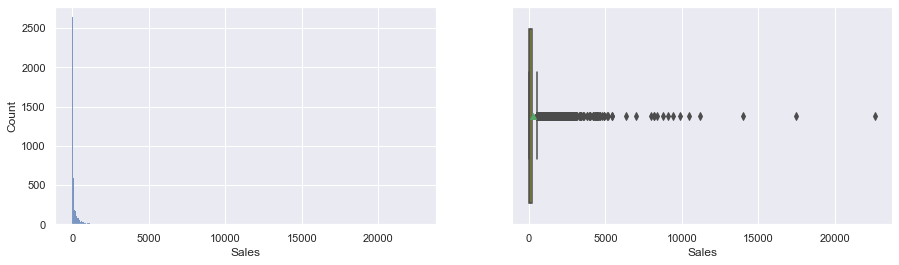

In [19]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Sales", data = df);
plt.subplot(122);
sns.boxplot(x = "Sales", showmeans = True, color = "yellow", data = df);

- Sales is highly right-skewed. Price vary a lot.

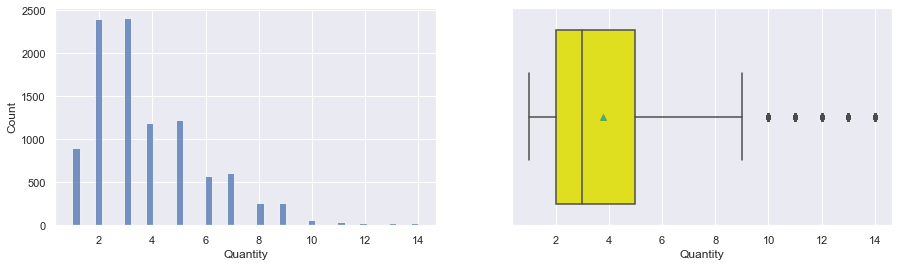

In [20]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Quantity", data = df);
plt.subplot(122);
sns.boxplot(x = "Quantity", showmeans = True, color = "yellow", data = df);

- It's more common to buy 2 ~ 3 quantities of the same product per order.

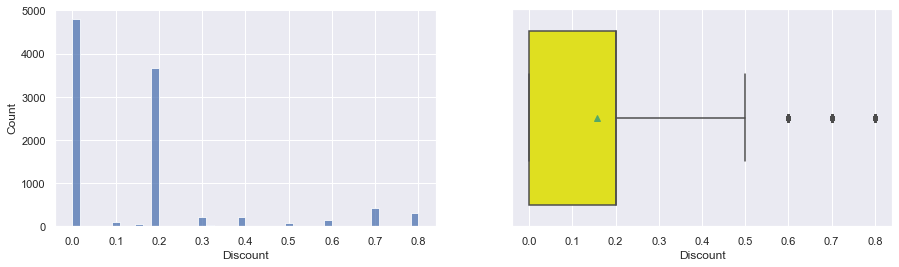

In [21]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Discount", data = df);
plt.subplot(122);
sns.boxplot(x = "Discount", showmeans = True, color = "yellow", data = df);

- No discount or 20% discount is mainstream.

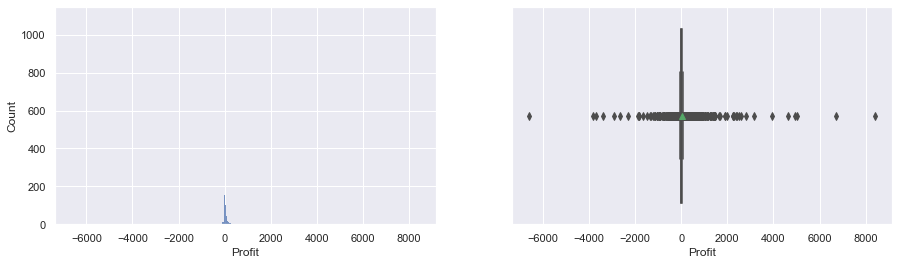

In [22]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Profit", data = df);
plt.subplot(122);
sns.boxplot(x = "Profit", showmeans = True, color = "yellow", data = df);

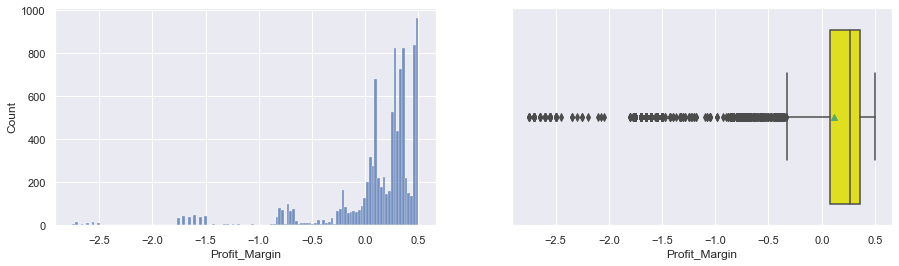

In [23]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Profit_Margin", data = df);
plt.subplot(122);
sns.boxplot(x = "Profit_Margin", showmeans = True, color = "yellow", data = df);

- Though the absolute value of profit is low, profit margin could be as high as 50%.
- In some cases, profit is negative.

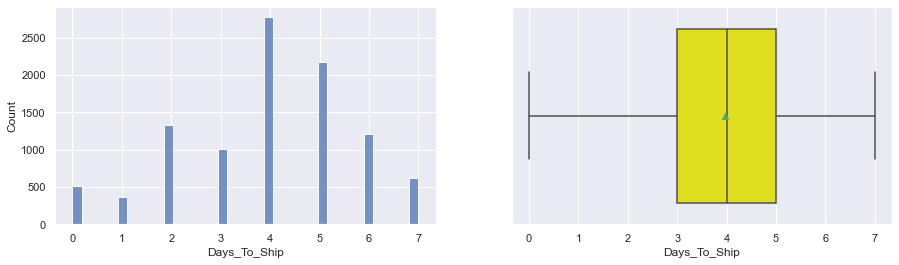

In [24]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Days_To_Ship", data = df);
plt.subplot(122);
sns.boxplot(x = "Days_To_Ship", showmeans = True, color = "yellow", data = df);

- Products were shipped within 7 days, some even shipped the same day. `Days_To_Ship` shows normal distribution.

In [25]:
def countplot(col):
    ax = df[col].value_counts().plot(kind = "bar");
    plt.xticks(rotation = 0);
    for p in ax.patches:
        plt.annotate(text = "{}%".format(np.round(p.get_height() / df.shape[0] * 100, 2)), xy = (p.get_x(), p.get_height()))

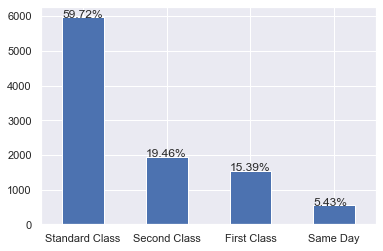

In [26]:
countplot("Ship_Mode")

- About 60% use standard class, followed by second class.

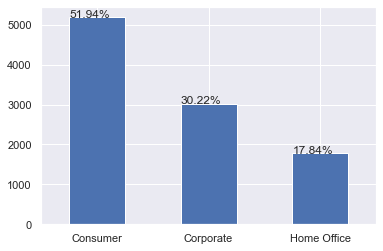

In [27]:
countplot("Segment")

- Half of the customers belong to consumer sector, followed by corporate.

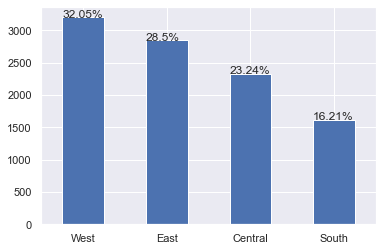

In [28]:
countplot("Region")

- West accounts for 30% of the orders. Only 16% orders are from south.

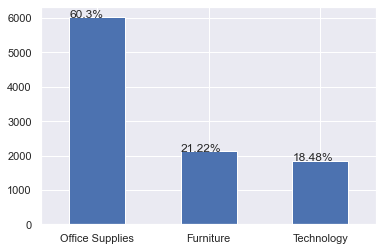

In [29]:
countplot("Category")

- Office supplies are the staple of our store.

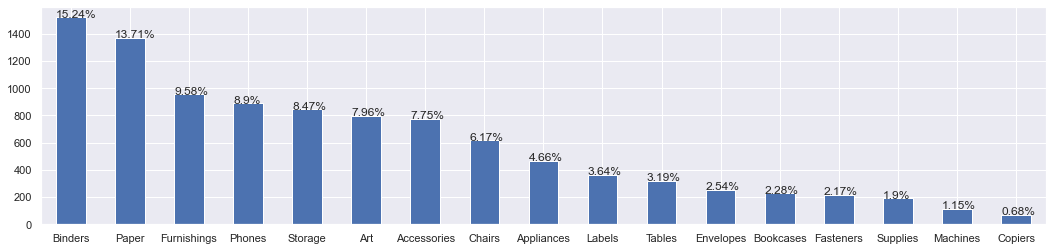

In [30]:
plt.figure(figsize = (18,4));
countplot("Sub_Category")

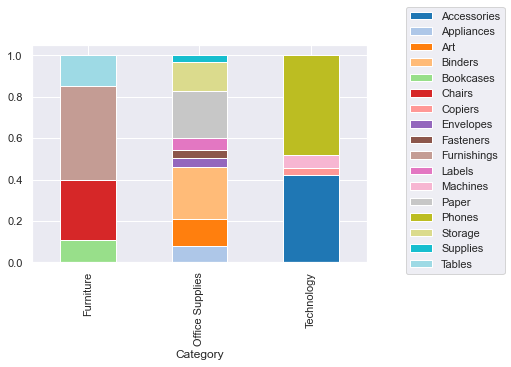

In [31]:
pd.crosstab(index = df.Category, columns = df.Sub_Category, normalize = "index").plot(stacked = True, kind = "bar", colormap = "tab20");
plt.legend(loc = "best", bbox_to_anchor = (1.1,1.2));

- Among all sub-categories, binders and papers achieve the highest sales volume.
- Among all furniture, Furnishings achieves the highest sales volume.
- Among all office supplies, binders and papers achieve the highest sales volume.
- Among all technological products, phones and accessories achieve the highest sales volume.

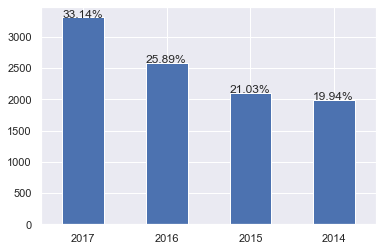

In [32]:
countplot("Order_Year")

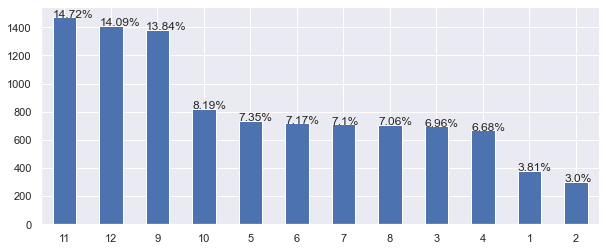

In [33]:
plt.figure(figsize = (10,4));
countplot("Order_Month")

- Data in this dataset cover 2014 - 2017.
- Orders increase over years.
- Peak season runs from September to December. Lean season runs from January to February.

## Bivariate and multivariate analysis
## Top 10 orders with highest profit

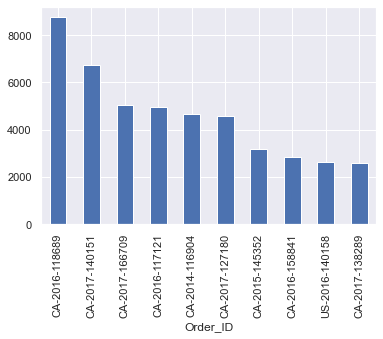

In [34]:
df.groupby("Order_ID")["Profit"].sum().sort_values(ascending = False).head(10).plot(kind = "bar");

In [35]:
df.loc[df.Order_ID.isin(df.groupby("Order_ID")["Profit"].sum().sort_values(ascending = False).head(10).index),["Order_ID","Customer_ID", 
                                                                                                               "Segment"]].drop_duplicates().set_index("Order_ID")

Customer_ID      Segment
Order_ID                               
CA-2015-145352    CM-12385     Consumer
CA-2017-127180    TA-21385  Home Office
CA-2014-116904    SC-20095     Consumer
CA-2017-166709    HL-15040     Consumer
CA-2017-138289    AR-10540     Consumer
CA-2016-118689    TC-20980    Corporate
US-2016-140158    DR-12940  Home Office
CA-2017-140151    RB-19360     Consumer
CA-2016-158841    SE-20110     Consumer
CA-2016-117121    AB-10105     Consumer

- The order with highest profit was placed by a corporate.
- Among 10 orders with highest profit, 7 were from consumer sector, 1 was from corporate and 2 from home office.

## Top 10 customers with most orders

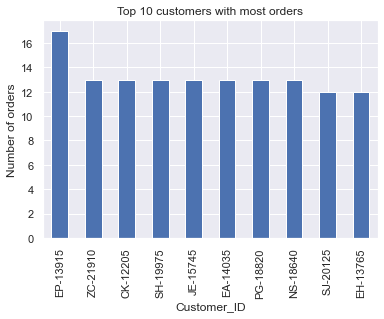

In [36]:
df.groupby('Customer_ID')['Order_ID'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar');
plt.title("Top 10 customers with most orders");
plt.ylabel("Number of orders");

In [37]:
df.loc[df.Customer_ID.isin(df.groupby('Customer_ID')['Order_ID'].nunique().sort_values(ascending = False).head(10).index), 
       ["Customer_ID","Segment"]].drop_duplicates().set_index("Customer_ID")

Segment
Customer_ID             
JE-15745        Consumer
SH-19975       Corporate
EA-14035       Corporate
EP-13915        Consumer
ZC-21910        Consumer
CK-12205        Consumer
PG-18820        Consumer
SJ-20125     Home Office
NS-18640       Corporate
EH-13765       Corporate

- The customer with the most orders is a consumer, who has placed 17 orders.
- Five of them are consumers, four are corporates and one is home office.

## Top 10 high-value customers

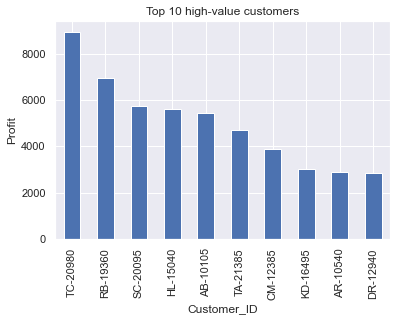

In [38]:
df.groupby("Customer_ID")["Profit"].sum().sort_values(ascending = False).head(10).plot(kind = 'bar');
plt.title("Top 10 high-value customers");
plt.ylabel("Profit");

In [39]:
df.loc[df.Customer_ID.isin(df.groupby('Customer_ID')['Profit'].sum().sort_values(ascending = False).head(10).index), 
       ["Customer_ID","Segment"]].drop_duplicates().set_index("Customer_ID")

Segment
Customer_ID             
RB-19360        Consumer
SC-20095        Consumer
CM-12385        Consumer
HL-15040        Consumer
AB-10105        Consumer
KD-16495       Corporate
AR-10540        Consumer
TC-20980       Corporate
TA-21385     Home Office
DR-12940     Home Office

- The customer from whom we earn the highest profit is a corporate.
- Six of them are consumers, two are corporates and two are home office.

## Profit generated by different segments

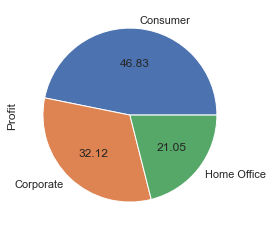

In [40]:
df.groupby("Segment")["Profit"].sum().plot(kind = "pie", autopct='%.2f');

- Consumer sector contributes 47% of total profits. Corporate sector contributes 32% and home office only 21%.

## Profit generated by different segments over years

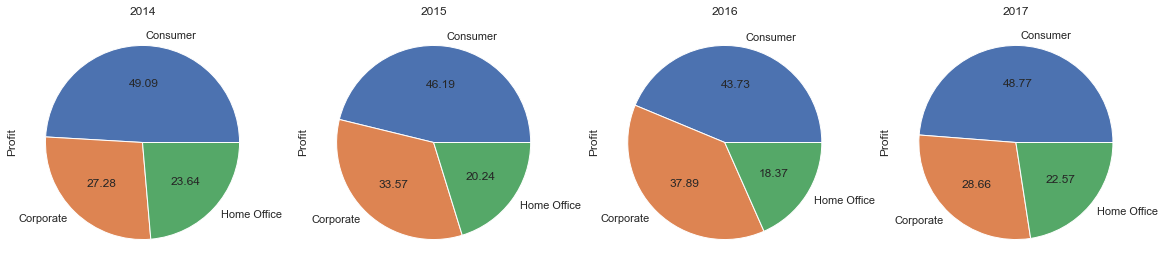

In [41]:
plt.figure(figsize = (20,5));
i = 1
for year in sorted(df.Order_Year.unique()):
    ax = plt.subplot(1, 4, i)
    ax = df[df.Order_Year == year].groupby("Segment")["Profit"].sum().plot(kind = "pie", autopct = "%.2f");
    ax.set_title(year);
    i += 1

## Profit vs category/ sub category

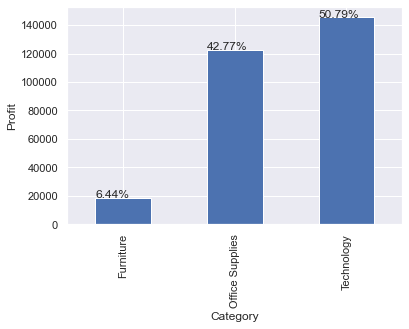

In [42]:
ax = df.groupby("Category")["Profit"].sum().plot(kind = "bar");
plt.ylabel("Profit");
for p in ax.patches:
    plt.annotate(text = "{}%".format(np.round(p.get_height() / df.Profit.sum() * 100, 2)), xy = (p.get_x(), p.get_height()))

- Though orders belonging to Technology category only account for 18.5% of total orders, they generate more than half of total profit.

**Let's check sub categories included in each category:**

In [43]:
for cat in df.Category.unique():
    print(cat)
    for subcat in df.loc[df.Category == cat, "Sub_Category"].unique():
        print(subcat, end = ',')
    print('\n')

Furniture
Bookcases,Chairs,Tables,Furnishings,

Office Supplies
Labels,Storage,Art,Binders,Appliances,Paper,Envelopes,Fasteners,Supplies,

Technology
Phones,Accessories,Machines,Copiers,



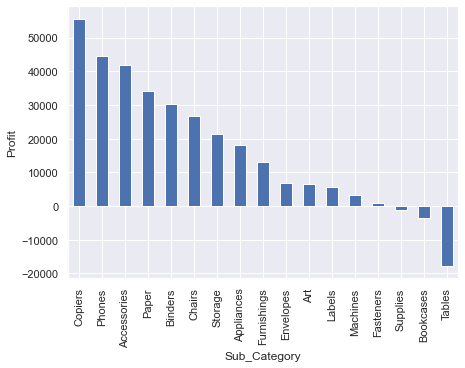

In [44]:
df.groupby("Sub_Category")["Profit"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (7,5));
plt.ylabel("Profit");

- Supplies, bookcases, tables incur loss.
- Fasteners and machines generate little profit.
- Copiers, phones, accessories are cash cows.

## Profit margin vs category/ sub category

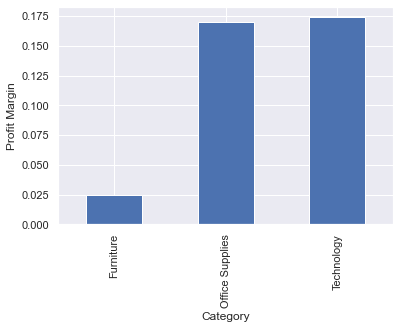

In [45]:
d1 = df.groupby("Category")["Profit"].sum()
d2 = df.groupby("Category")["Sales"].sum()
(d1/d2).plot(kind = "bar");
plt.ylabel("Profit Margin");

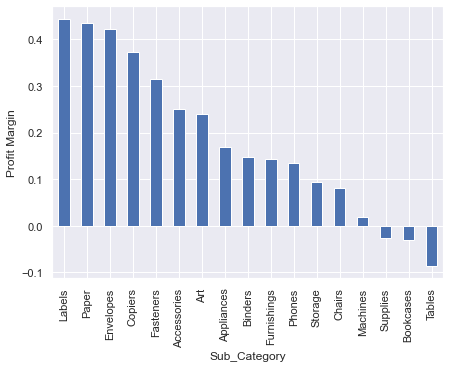

In [46]:
d1 = df.groupby("Sub_Category")["Profit"].sum()
d2 = df.groupby("Sub_Category")["Sales"].sum()
(d1/d2).sort_values(ascending = False).plot(kind = "bar", figsize = (7,5));
plt.ylabel("Profit Margin");

- Technology is the most profitable category. Furniture is the least profitable category.
- Labels, paper, envelopes are top 3 most profitable sub categories.

## Ship mode vs days_to_ship

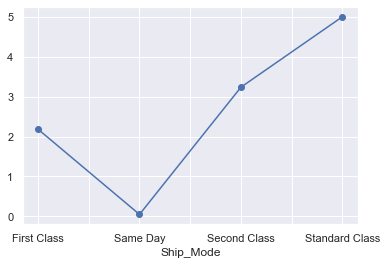

In [47]:
df.groupby("Ship_Mode")["Days_To_Ship"].mean().plot(kind = "line", marker = "o");

## Category/Sub Category vs Ship Mode

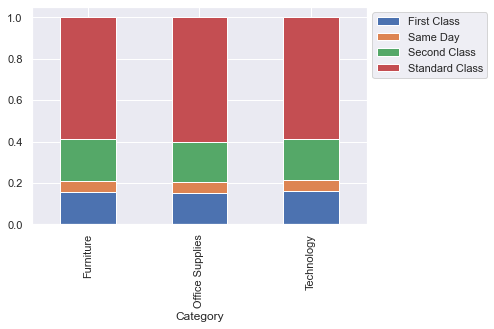

In [48]:
pd.crosstab(index = df.Category, columns = df.Ship_Mode, normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(loc = "best", bbox_to_anchor = (1.0,1.0));

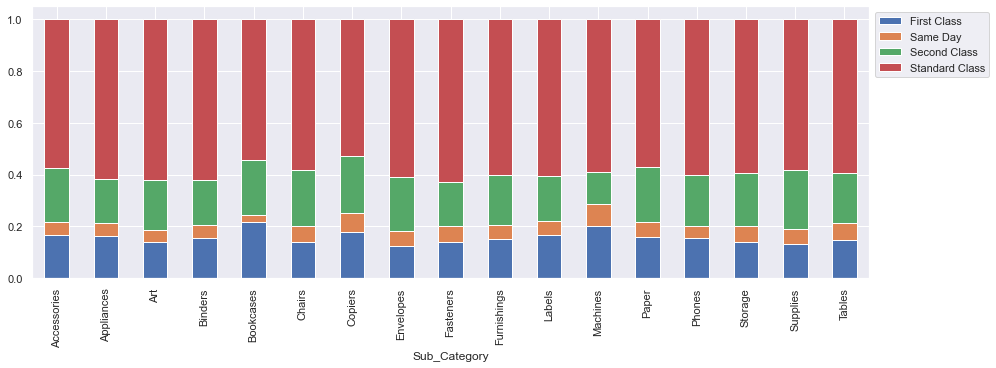

In [49]:
pd.crosstab(index = df.Sub_Category, columns = df.Ship_Mode, normalize = "index").plot(kind = "bar", stacked = True, figsize = (15,5));
plt.legend(loc = "best", bbox_to_anchor = (1.0,1.0));

- Ship mode has nothing to do with category/ sub category.

## Segment vs Ship Mode

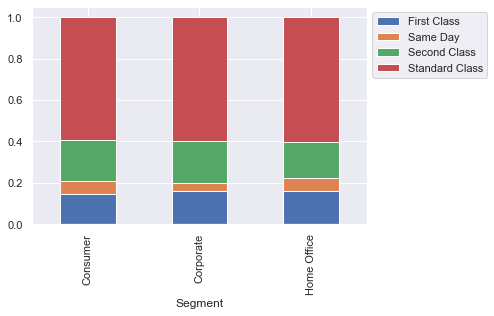

In [50]:
pd.crosstab(index = df.Segment, columns = df.Ship_Mode, normalize = "index").plot(kind = "bar", stacked = True);
plt.legend(loc = "best", bbox_to_anchor = (1.0,1.0));

- Ship mode has nothing to do with segment.

## Top 10 states/ cities/ postal codes/ regions with most orders

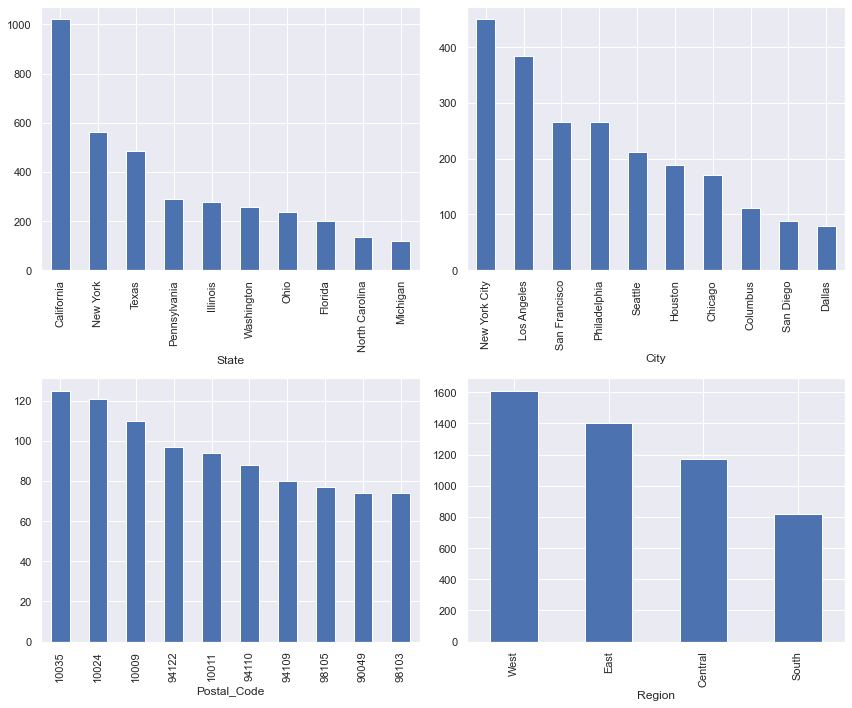

In [51]:
plt.figure(figsize = (12,10));
plt.subplot(221);
df.groupby('State')['Order_ID'].nunique().sort_values(ascending = False).head(10).plot(kind = "bar");
plt.subplot(222);
df.groupby('City')['Order_ID'].nunique().sort_values(ascending = False).head(10).plot(kind = "bar");
plt.subplot(223);
df.groupby('Postal_Code')['Order_ID'].nunique().sort_values(ascending = False).head(10).plot(kind = "bar");
plt.subplot(224);
df.groupby('Region')['Order_ID'].nunique().sort_values(ascending = False).plot(kind = "bar");
plt.tight_layout();

- CA has the most orders, followed by NY.
- Top 10 cities with most orders are all metros.
- Customers from west region place most orders. 

## Top 10 trending products at all times

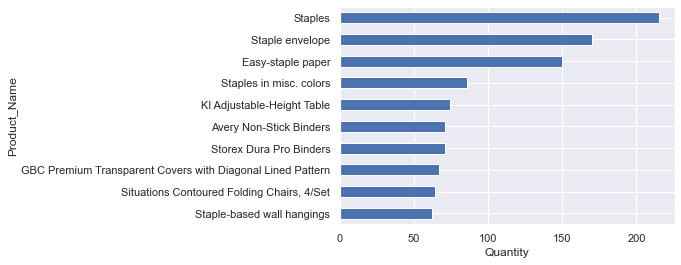

In [52]:
df.groupby("Product_Name")["Quantity"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
plt.xlabel("Quantity");

- Staples, staple envelope and easy-staple paper are the most popular products.

## Top 10 trending products each year

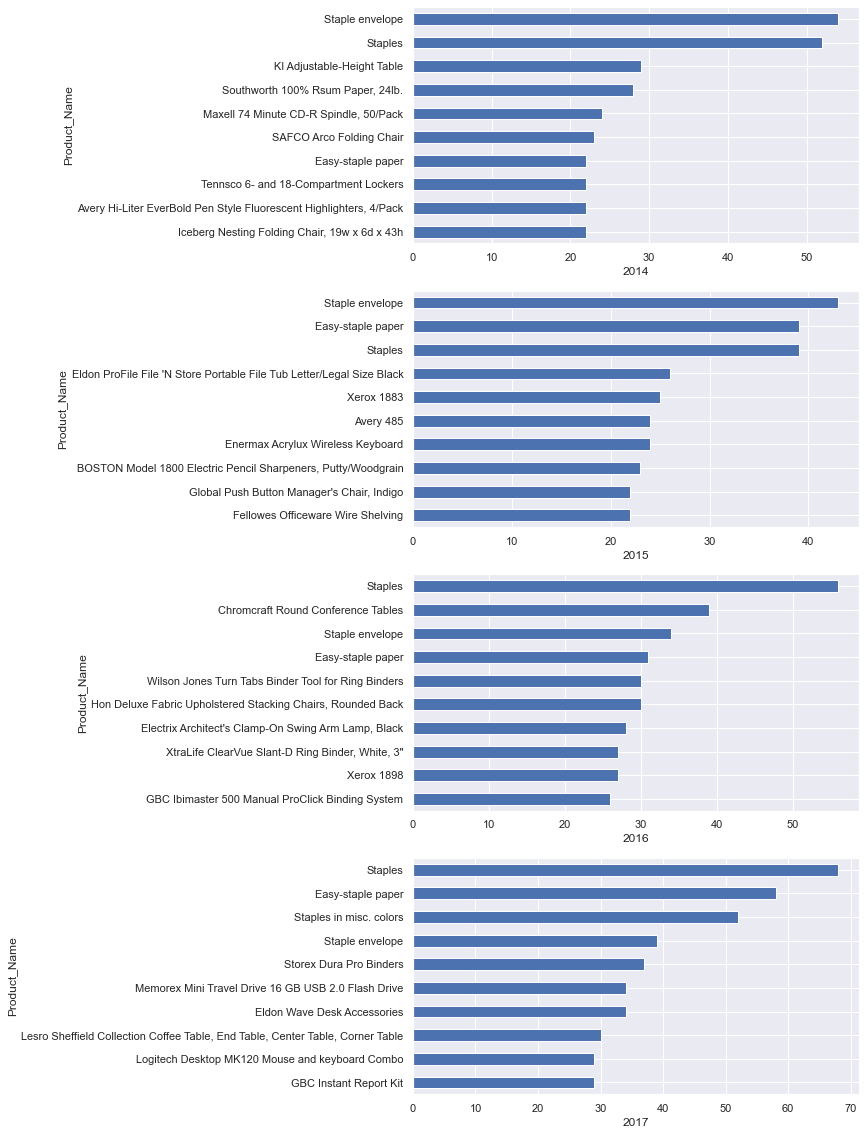

In [53]:
plt.figure(figsize = (8,20));
gs = grd.GridSpec(4,1);
for year in range(2014, 2018):
    plt.subplot(gs[year - 2014]);
    df[df.Order_Year == year].groupby("Product_Name")["Quantity"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
    plt.xlabel(year);

- Staples, staple envelope and easy-staple paper are always among the trending products.

## Top 10 trending products each month

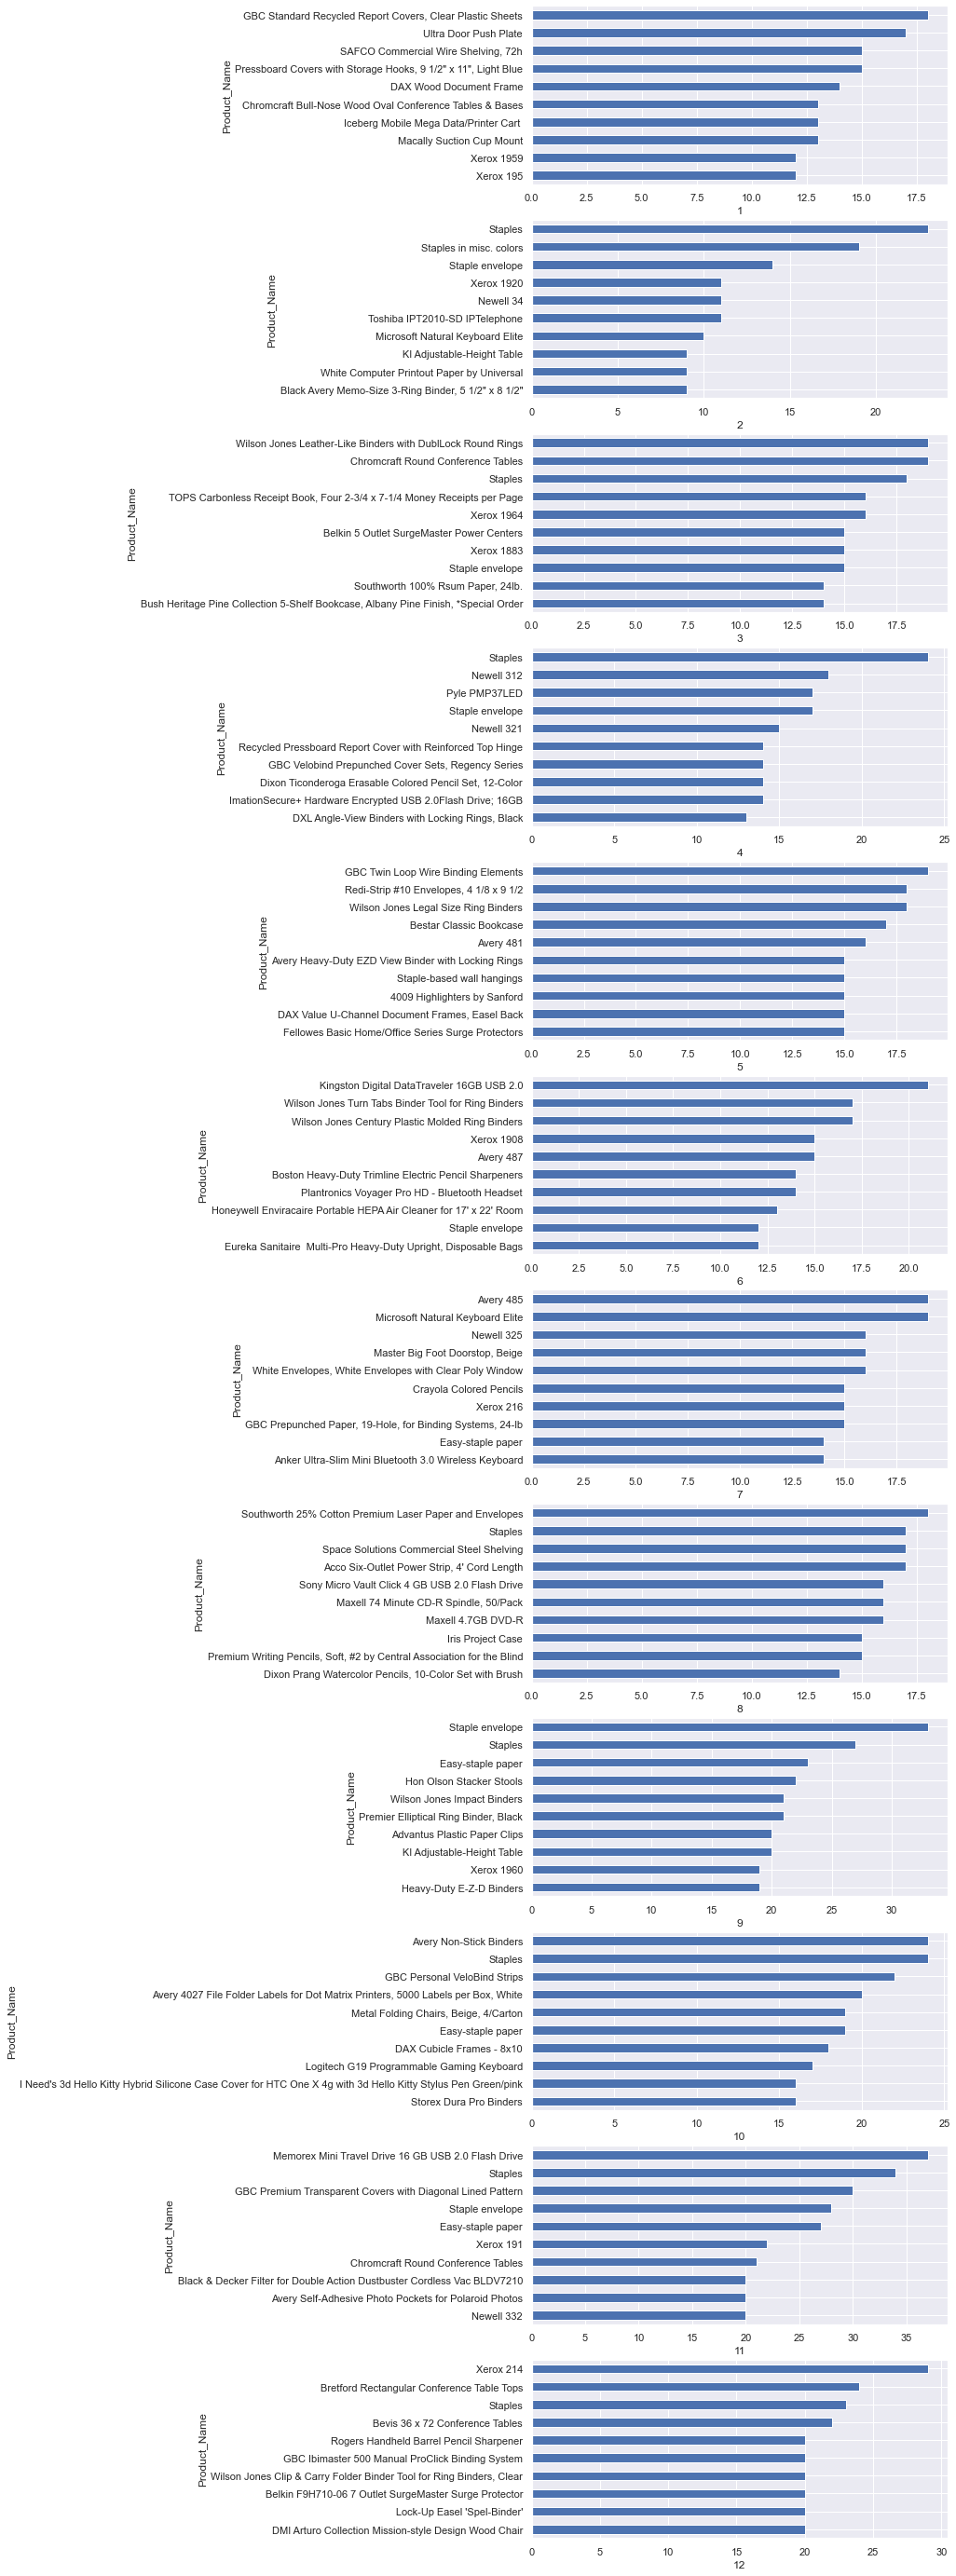

In [54]:
plt.figure(figsize = (8,50));
gs = grd.GridSpec(12,1);
for month in range(1, 13):
    plt.subplot(gs[month - 1]);
    df[df.Order_Month == month].groupby("Product_Name")["Quantity"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
    plt.xlabel(month);

## Top 10 trending products in each region

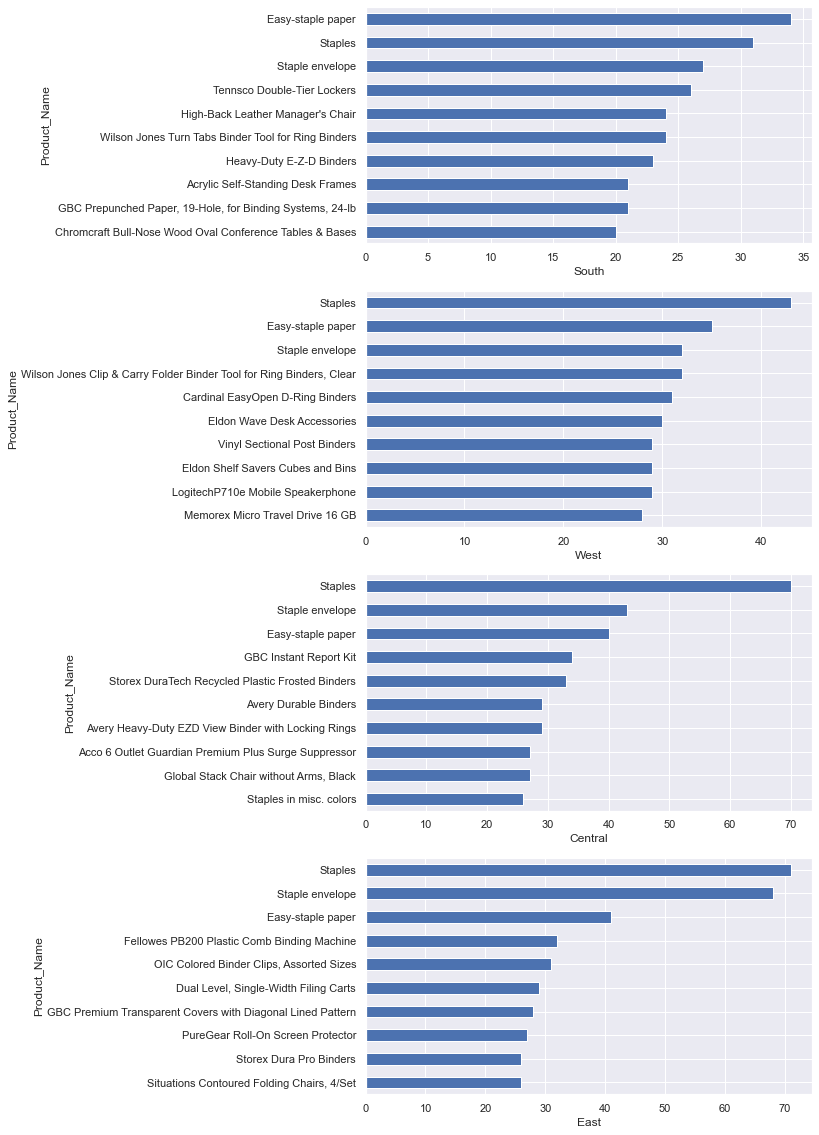

In [55]:
plt.figure(figsize = (8,20));
gs = grd.GridSpec(4,1);
for i, region in enumerate(df.Region.unique()):
    plt.subplot(gs[i]);
    df[df.Region == region].groupby("Product_Name")["Quantity"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
    plt.xlabel(region);

- Staples, staple envelope and easy-staple paper are always the most popular products in whichever region.

## Trending products in particular states

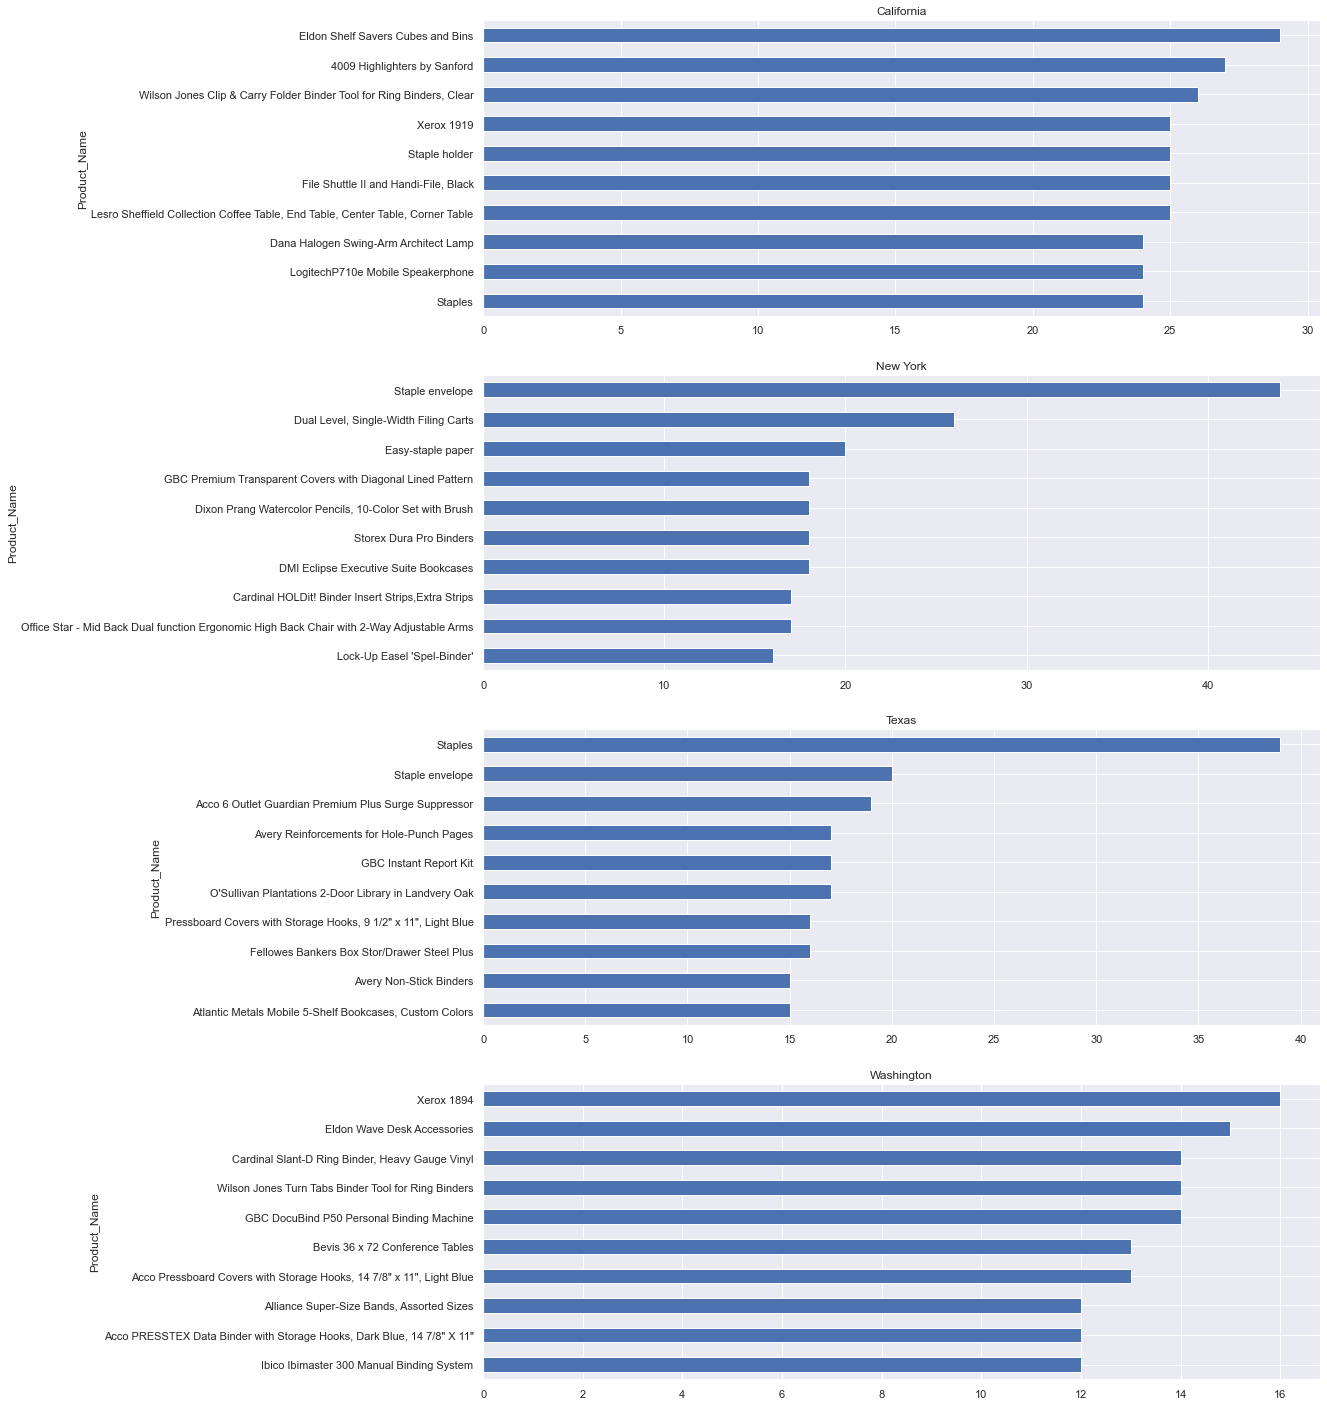

In [56]:
states = ["California", "New York", "Texas", "Washington"]
plt.figure(figsize = (15,25));
i = 0
for state in states:
    plt.subplot(gs[i]);
    df[df.State == state].groupby("Product_Name")["Quantity"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
    plt.title(state);
    i += 1

## Top 10 products with the highest sales

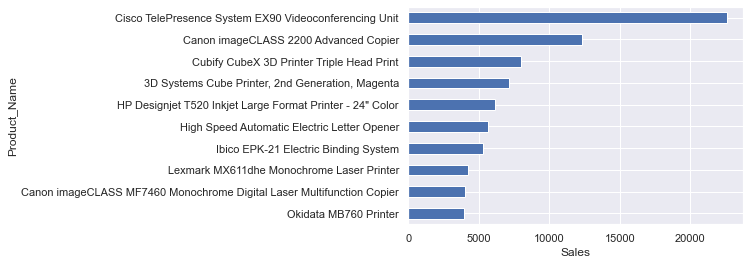

In [57]:
df.groupby("Product_Name")["Sales"].mean().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
plt.xlabel("Sales");

## Products with the highest profit/ profit margin

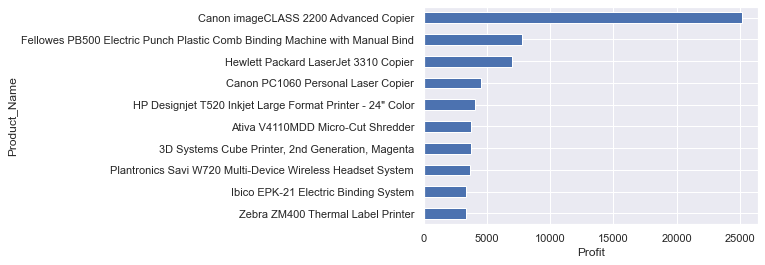

In [58]:
df.groupby("Product_Name")["Profit"].sum().sort_values(ascending = False).head(10).plot(kind = "barh").invert_yaxis();
plt.xlabel("Profit");

In [59]:
pd.DataFrame({"Products with highest profit margin": df.loc[df["Profit_Margin"] == df["Profit_Margin"].max(), "Product_Name"].unique()})

Products with highest profit margin
0                         Prang Dustless Chalk Sticks
1   Adams Telephone Message Book w/Frequently-Call...
2   Canon imageCLASS MF7460 Monochrome Digital Las...
3                                    OIC Binder Clips
4                    Southworth Structures Collection
5              Alphabetical Labels for Top Tab Filing
6   Fellowes PB500 Electric Punch Plastic Comb Bin...
7                      Presstex Flexible Ring Binders
8              Tops Green Bar Computer Printout Paper
9                      Brown Kraft Recycled Envelopes
10                   Cardinal EasyOpen D-Ring Binders
11                             GBC Instant Report Kit
12              Southworth 100% Cotton The Best Paper
13  White Business Envelopes with Contemporary Sea...
14                      Cardinal Slant-D Ring Binders
15  Avery Binding System Hidden Tab Executive Styl...
16        Memo Book, 100 Message Capacity, 5 3/8 x 11
17                                          Avery 490
18                              Surelock Post Binders
19               Wilson Jones DublLock D-Ring Binders
20  GE 48" Fluorescent Tube, Cool White Energy Sav...
21                 netTALK DUO VoIP Telephone Service
22  "While you Were Out" Message Book, One Form pe...
23                                    Staple envelope
24                               Aluminum Screw Posts
25   Storex DuraTech Recycled Plastic Frosted Binders
26  REDIFORM Incoming/Outgoing Call Register, 11" ...
27          Motorla HX550 Universal Bluetooth Headset
28                                          Avery 505
29                                            Staples
30  Flexible Leather- Look Classic Collection Ring...
31                Performers Binder/Pad Holder, Black
32                GBC Twin Loop Wire Binding Elements
33                                         Xerox 1942
34                                         Xerox 1890
35    DYMO CardScan Personal V9 Business Card Scanner
36        Green Canvas Binder for 8-1/2" x 14" Sheets
37  Recycled Interoffice Envelopes with String and...
38                       Vinyl Sectional Post Binders
39  XtraLife ClearVue Slant-D Ring Binders by Card...
40               Wilson Jones Legal Size Ring Binders
41                  Sharp 1540cs Digital Laser Copier
42      Peel & Seel Recycled Catalog Envelopes, Brown
43                              GBC VeloBinder Strips
44               Ibico Recycled Grain-Textured Covers
45                                          Avery 475
46                            GBC VeloBind Cover Sets
47                   Samsung HM1900 Bluetooth Headset
48                                         Xerox 1916
49                                Unpadded Memo Slips
50  Avery Triangle Shaped Sheet Lifters, Black, 2/...
51   GBC Ibimaster 500 Manual ProClick Binding System
52       GBC Instant Index System for Binding Systems

## Products with the average discount no less than 50%

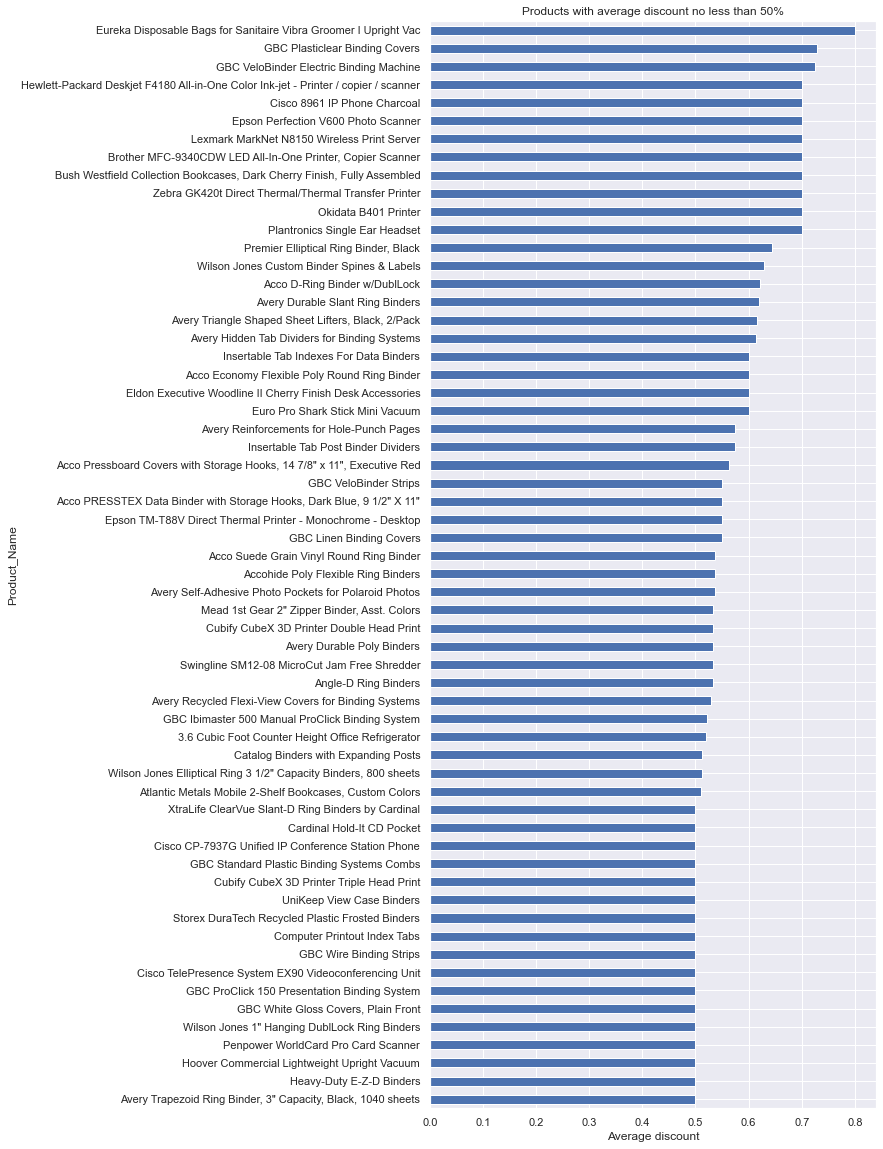

In [60]:
d1 = df.groupby("Product_Name")["Discount"].mean().sort_values(ascending = False)
d1[d1 >= 0.5].plot(kind = "barh", figsize = (8,20)).invert_yaxis();
plt.xlabel("Average discount");
plt.title("Products with average discount no less than 50%");

## Avergage discount for sub category

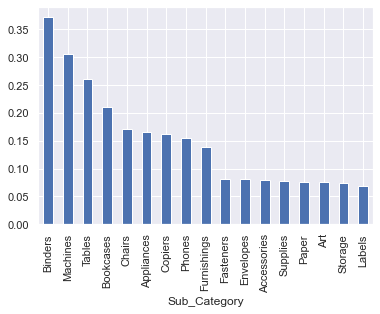

In [61]:
df.groupby("Sub_Category")["Discount"].mean().sort_values(ascending = False).plot(kind = "bar");

## Discount for sub category over time

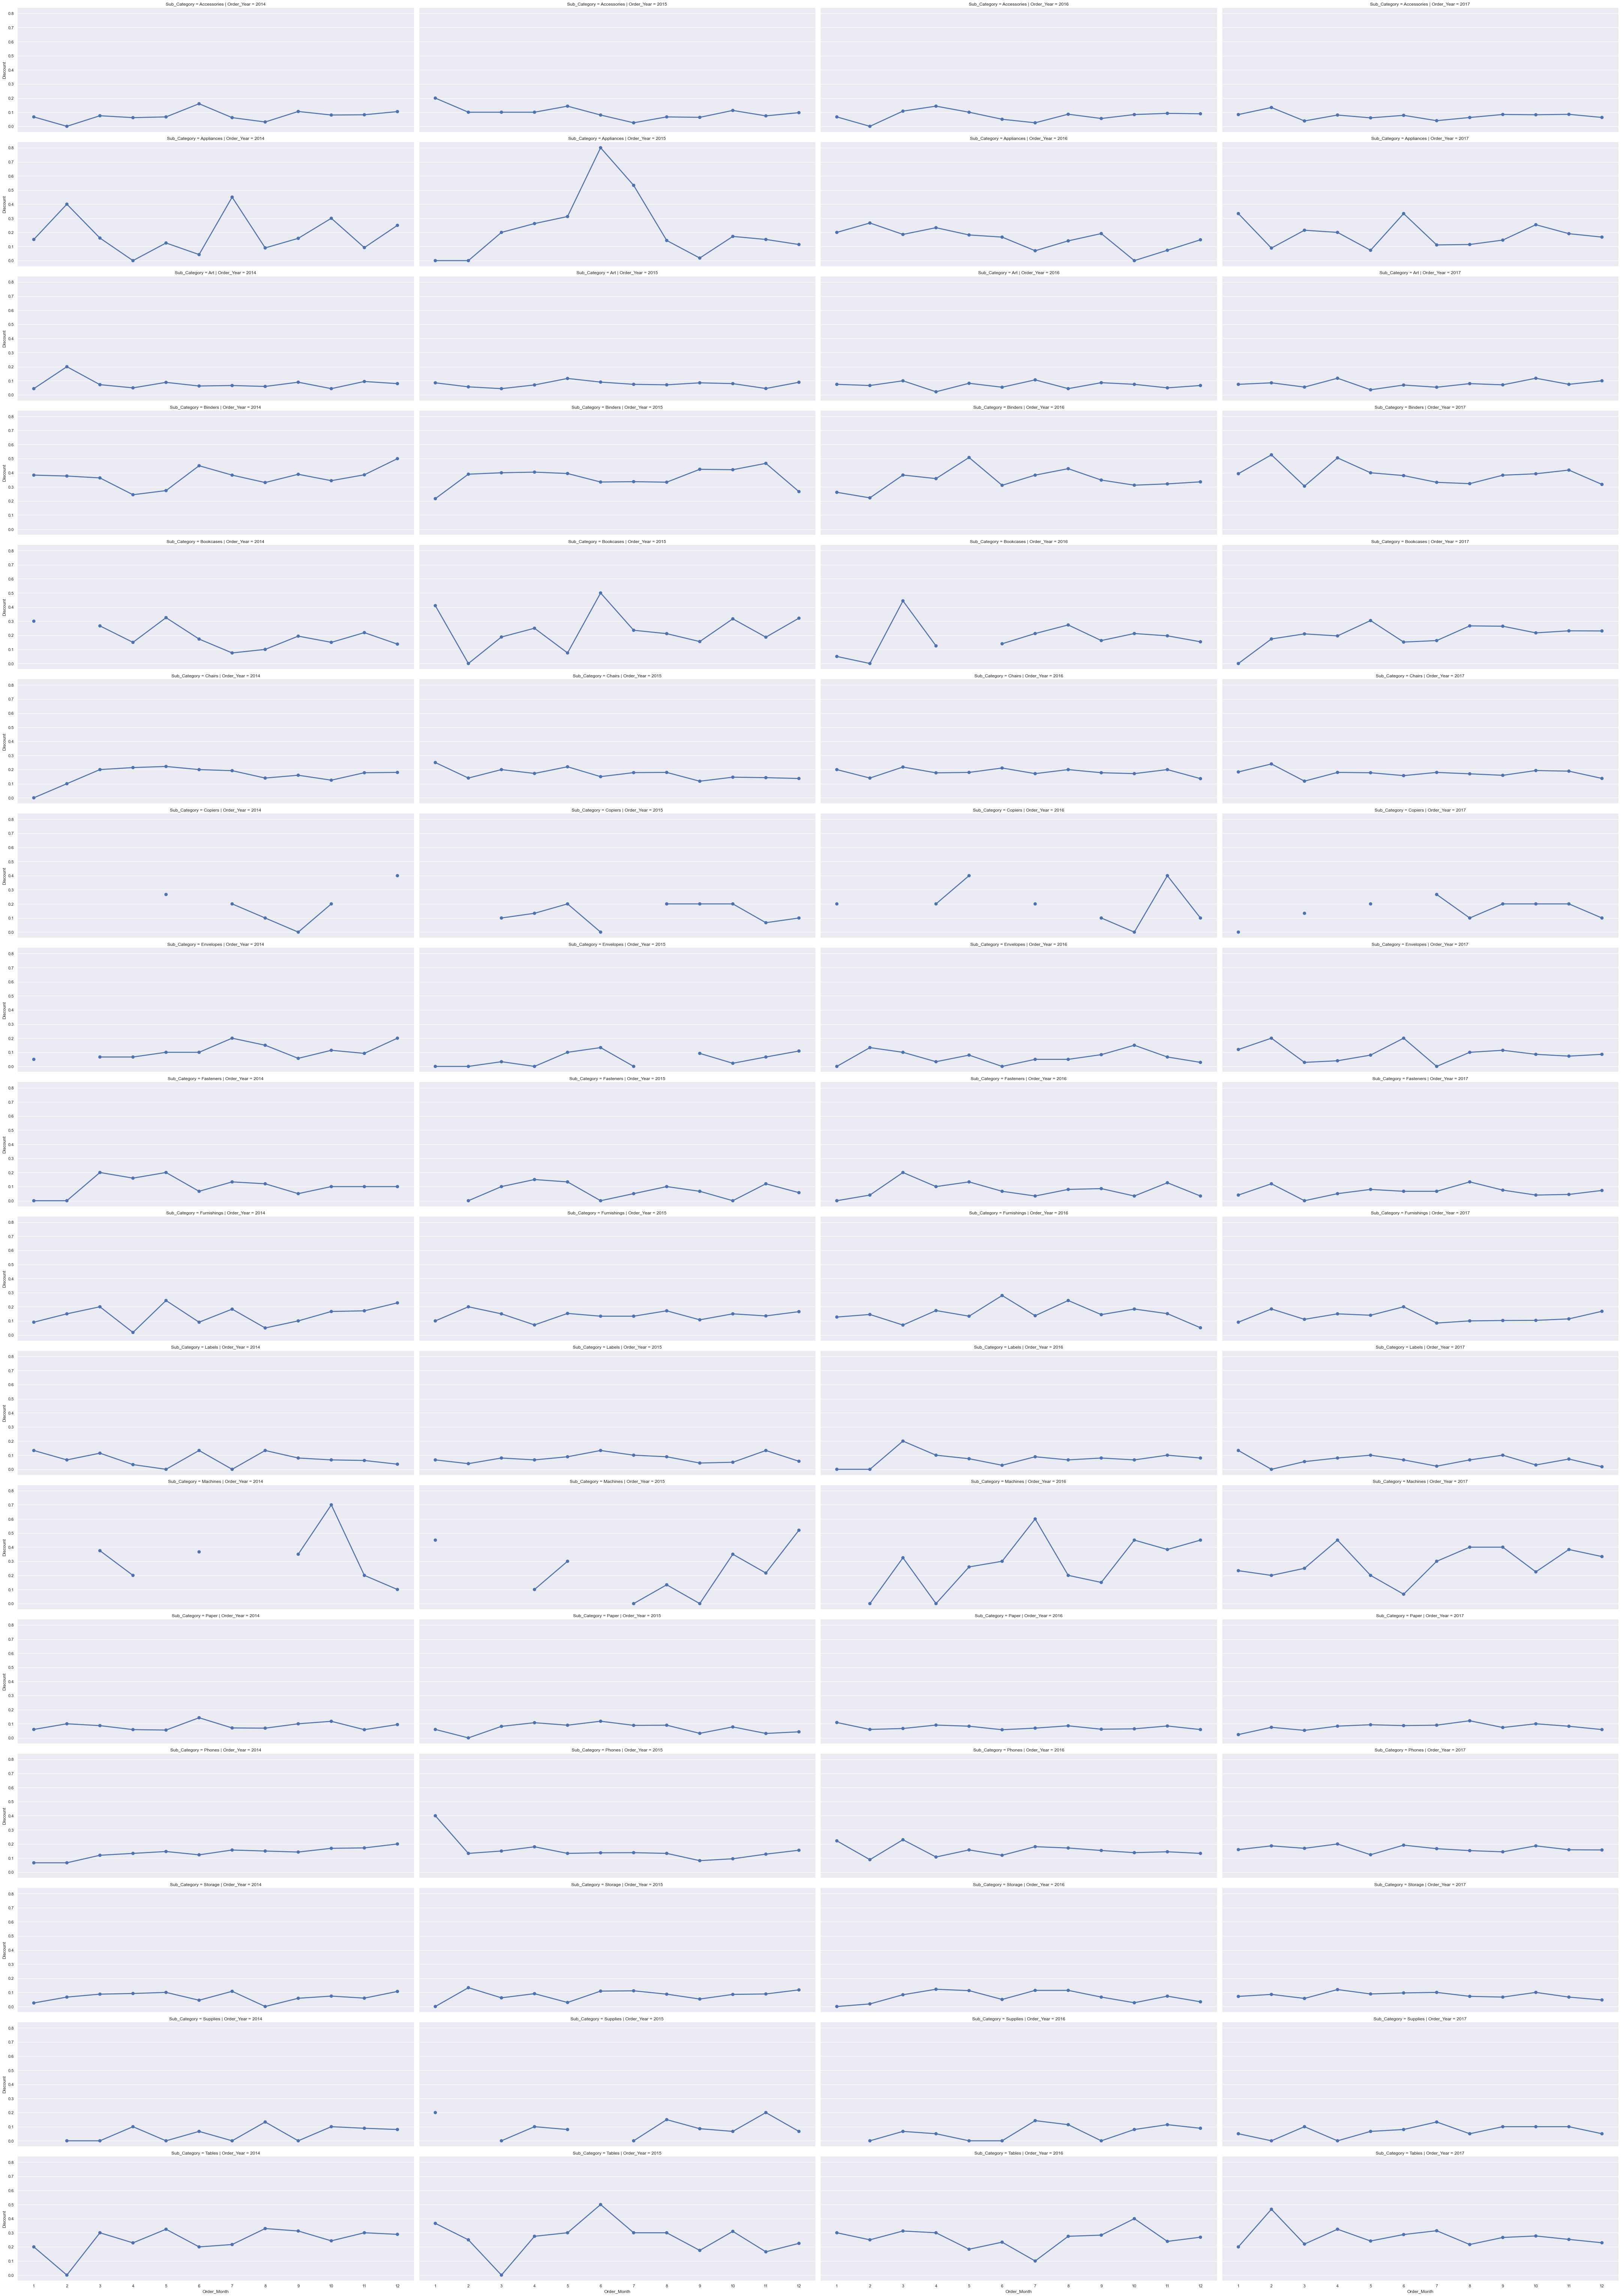

In [62]:
sns.catplot(x = "Order_Month", y = "Discount", row = "Sub_Category", col = "Order_Year", kind = "point", ci = None, data = df, aspect = 3);

- Desirable discounts all year long, sometimes even as high as 70% - 80%: appliances, machines, tables.
- 40% - 50% discount: binders.
- 10% - 30% discount: bookcases, chairs, copiers, envelopes, fasteners, furnishings, phones.
- Little discount: paper, accessories, art, labels, storages, supplies.

## Average profit margin for sub category

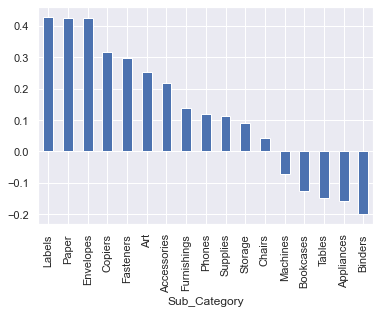

In [63]:
df.groupby("Sub_Category")["Profit_Margin"].mean().sort_values(ascending = False).plot(kind = "bar");

## Average discount for different segments

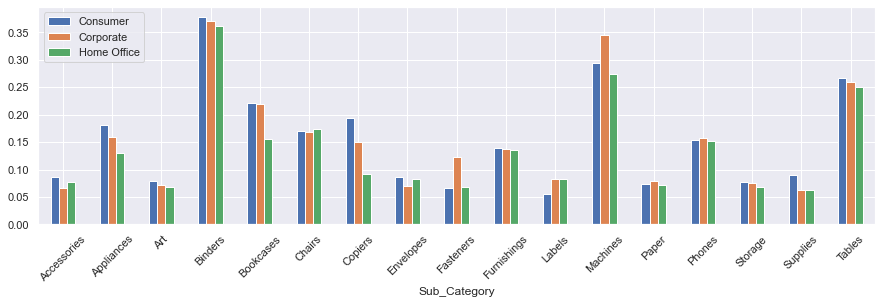

In [64]:
pd.pivot_table(data = df, index = "Segment", columns = "Sub_Category", values = "Discount", aggfunc = "mean").T.plot(kind = "bar", figsize = (15,4));
plt.legend(loc = "upper left");
plt.xticks(rotation = 45);

- Corporate gets higher discounts in fasteners, machines, paper, phones.
- Consumer gets higher discounts in accessories, appliances, art, binders, copiers, supplies, tables.

## Profit over years

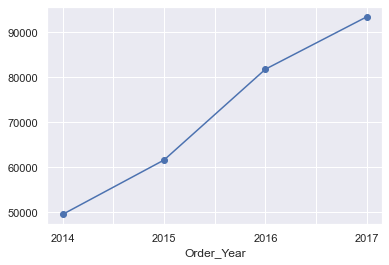

In [65]:
df.groupby("Order_Year")["Profit"].sum().plot(kind = "line", marker = "o");

- Profit increases over years.

## Profit over months

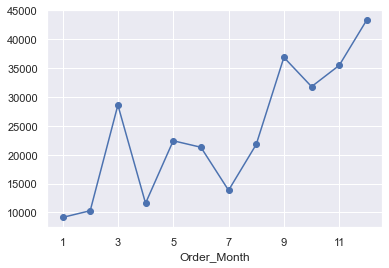

In [66]:
df.groupby("Order_Month")["Profit"].sum().plot(kind = "line", marker = "o");

- Peak seasons generate more profit.

## Profit vs year vs month

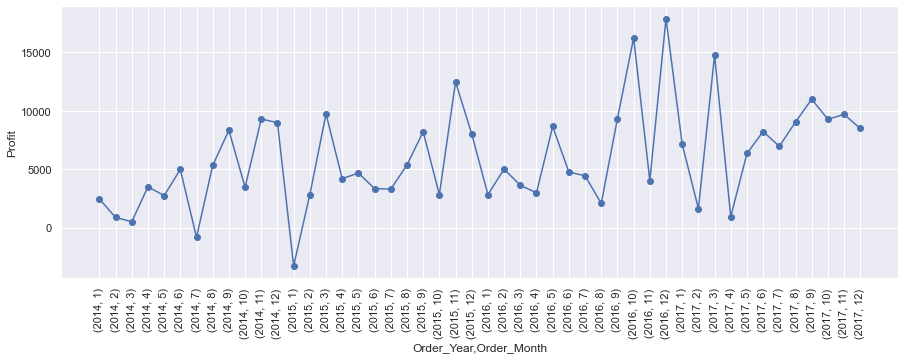

In [67]:
d1 = df.groupby(["Order_Year", "Order_Month"])["Profit"].sum()
d1.plot(kind = "line", marker = 'o', figsize = (15,5));
plt.ylabel("Profit");
plt.xticks(ticks = range(48), labels = d1.index, rotation = 90);

- Months of high profit: 2016/12, 2016/10, 2017/03.
- Months of loss: 2015/01, 2014/07.

## Average days to ship each year

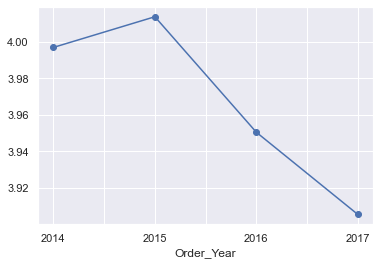

In [68]:
df.groupby("Order_Year")["Days_To_Ship"].mean().plot(kind = "line", marker = "o");

- Mean Days_To_Ship is reduced in 2016 - 2017.

## Average days to ship for each state

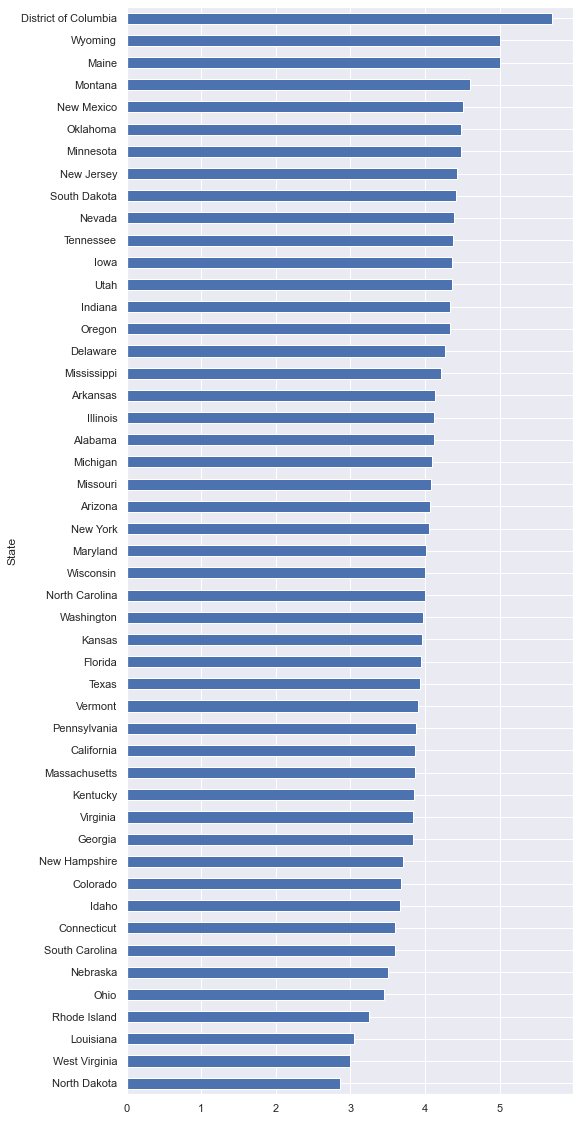

In [69]:
df.groupby("State")["Days_To_Ship"].mean().sort_values(ascending = False).plot(kind = "barh", figsize = (8,20)).invert_yaxis();

- Orders to DC takes the longest to start shipping, followed by WY and ME.

## Profit vs Region

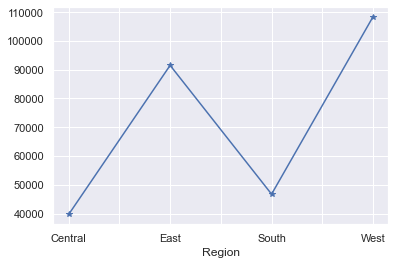

In [70]:
df.groupby("Region")["Profit"].sum().plot(kind = "line", marker = "*");

- West region has the most orders and generates the highest profit, while Central generates the least profit.

## Profit vs Segment vs Region

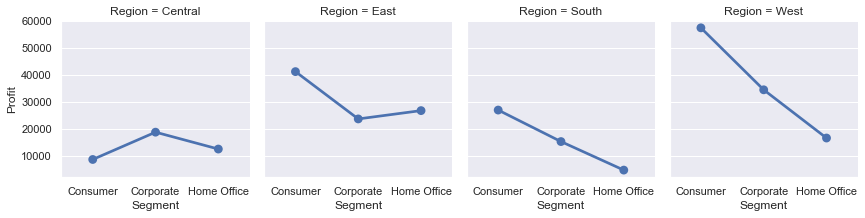

In [71]:
sns.catplot(x = "Segment", y = "Profit", estimator = np.sum,col = "Region", kind = "point", ci = None, data = df, height = 3, aspect = 1);

- Consumer sector generates the highest profit in East/ South/ West region. Corporate sector generates the highest profit in Central region.

## Profit vs State

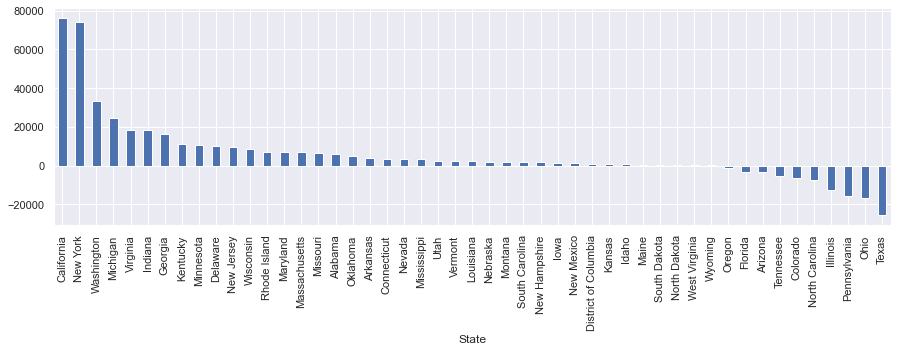

In [72]:
df.groupby("State")["Profit"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (15,4));

- Though CA, NY and TX are the most popular destinations for our orders, CA, NY and WA generate the highest profit, while TX generates the highest loss.
- More than 15 states generate little profit.

## Top 10 cities with highest profit

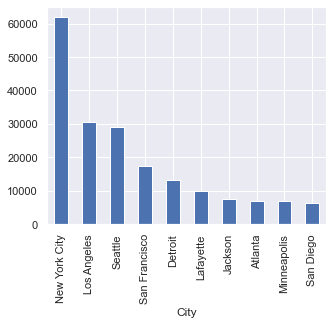

In [73]:
df.groupby("City")["Profit"].sum().sort_values(ascending = False).head(10).plot(kind = "bar", figsize = (5,4));

- NYC and LA are the cities of both most orders and highest profit. But not all cities with large amount of orders generate large profit.

## Pairplot and Correlation

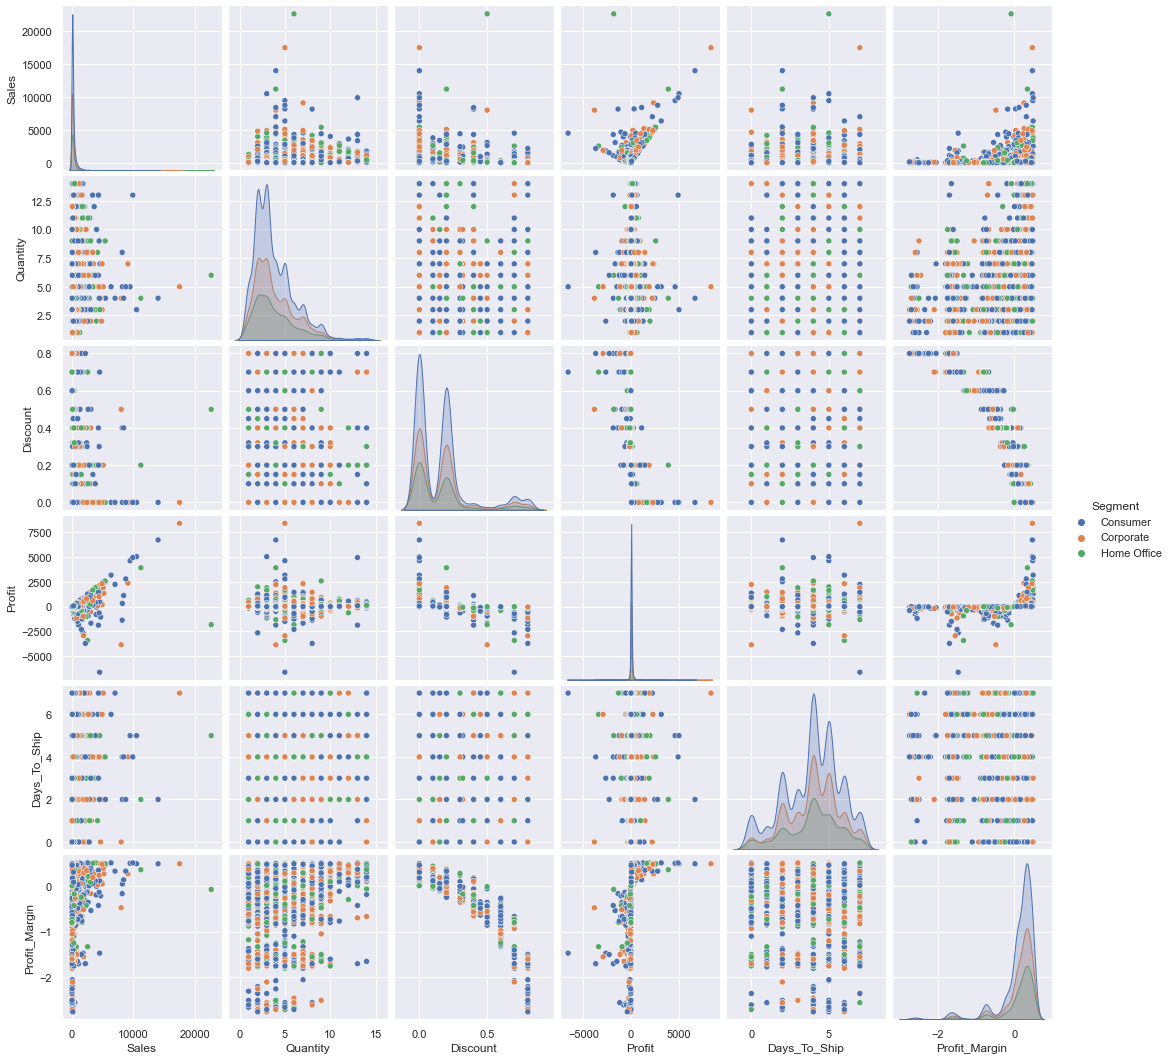

In [74]:
sns.pairplot(df, hue = "Segment");

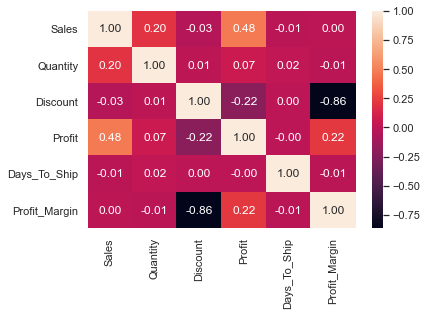

In [75]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f");

- `Profit` and `Sales` are positively correlated.
- `Profit` and `Discount` are negatively correlated.

# Data preprocessing
## To build a regression model to predict `Profit`, first extract the features of interest:

In [76]:
X = df[["Ship_Mode", "Segment", "City", "State", "Region", "Product_ID", "Category", "Sub_Category", "Order_Year","Order_Month", 
          "Sales","Quantity","Discount", "Profit"]]

In [77]:
X.head(2)

Ship_Mode   Segment       City     State Region       Product_ID  \
0  Second Class  Consumer  Henderson  Kentucky  South  FUR-BO-10001798   
1  Second Class  Consumer  Henderson  Kentucky  South  FUR-CH-10000454   

    Category Sub_Category Order_Year Order_Month   Sales  Quantity  Discount  \
0  Furniture    Bookcases       2016          11  261.96         2       0.0   
1  Furniture       Chairs       2016          11  731.94         3       0.0   

     Profit  
0   41.9136  
1  219.5820

In [78]:
X.describe()

Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000

In [79]:
X.describe(include ="category")

Ship_Mode   Segment           City       State Region  \
count             9994      9994           9994        9994   9994   
unique               4         3            531          49      4   
top     Standard Class  Consumer  New York City  California   West   
freq              5968      5191            915        2001   3203   

             Product_ID         Category Sub_Category  Order_Year  Order_Month  
count              9994             9994         9994        9994         9994  
unique             1862                3           17           4           12  
top     OFF-PA-10001970  Office Supplies      Binders        2017           11  
freq                 19             6026         1523        3312         1471

## Split data

In [80]:
y = X.pop("Profit")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

## Ordinal encoding

In [81]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = 1900)
cols = X.select_dtypes("category").columns
X_train.loc[:, cols] = ordinal_encoder.fit_transform(X_train.loc[:, cols])
X_test.loc[:, cols] = ordinal_encoder.transform(X_test.loc[:, cols])

## Mutual information

In [82]:
mi = mutual_info_regression(X = X_train, y = y_train, n_neighbors = 5, random_state = 3)
pd.DataFrame(np.round(mi, 3), index = X_train.columns, columns = ["Mutual Information"]).sort_values(by = "Mutual Information", ascending = False).T

Sales  Discount  Sub_Category  Product_ID  Quantity  \
Mutual Information  1.543     0.425         0.416       0.347     0.205   

                    State  Category   City  Region  Ship_Mode  Segment  \
Mutual Information  0.174     0.138  0.079   0.037      0.003    0.002   

                    Order_Month  Order_Year  
Mutual Information        0.001         0.0

- `Profit` has medium or high dependency on `Sales`, `Discount`, `Sub_Category`, `Product_ID`. 

## Outlier treatment
Apply outlier treatment on `Sales` and `Profit`.

In [83]:
def outlier_treatment(x, low, up):
    return x.clip(lower=low, upper=up, axis=0)

In [84]:
X_train.loc[:, "Sales"] = outlier_treatment(X_train.loc[:, "Sales"], 0, 5000)
X_test.loc[:, "Sales"] = outlier_treatment(X_test.loc[:, "Sales"], 0, 5000)

y_train = outlier_treatment(y_train, -2000, 2000)
y_test = outlier_treatment(y_test, -2000, 2000)

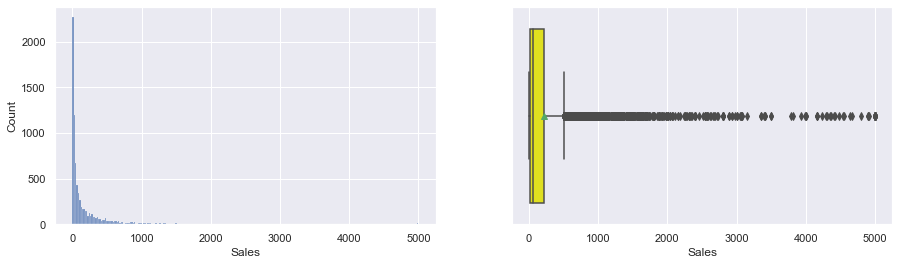

In [85]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = "Sales", data = X_train);
plt.subplot(122);
sns.boxplot(x = "Sales", showmeans = True, color = "yellow", data = X_train);

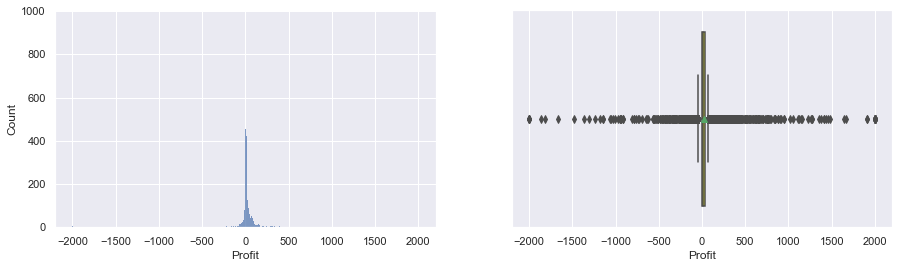

In [86]:
plt.figure(figsize = (15,4));
plt.subplot(121);
sns.histplot(x = y_train);
plt.subplot(122);
sns.boxplot(x = y_train, showmeans = True, color = "yellow");

## Scaling

In [87]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building

In [88]:
def metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    rmse_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_test, model.predict(X_test), squared=False)
    
    print("Train: R2: {:.3f}, RMSE: {:.3f}".format(r2_train, rmse_train))
    print("Test: R2: {:.3f}, RMSE: {:.3f}".format(r2_test, rmse_test))

## Random forest

In [89]:
rf = RandomForestRegressor(n_jobs=-1, random_state=0)
metrics(rf, X_train, y_train, X_test, y_test)

Train: R2: 0.975, RMSE: 26.205
Test: R2: 0.917, RMSE: 46.138


In [90]:
pi = permutation_importance(rf, X_test, y_test, scoring="r2", n_repeats=5, n_jobs=-1, random_state=10)
pd.DataFrame({"Permutation Importance mean": np.round(pi.importances_mean,3), 
              "Permutation Importance std": np.round(pi.importances_std,3)}, index = X.columns).sort_values("Permutation Importance mean", ascending = False)

Permutation Importance mean  Permutation Importance std
Sales                               1.759                       0.110
Discount                            1.382                       0.084
Sub_Category                        0.120                       0.012
Product_ID                          0.031                       0.004
State                               0.014                       0.005
Quantity                            0.010                       0.002
Region                              0.007                       0.005
Category                            0.004                       0.000
Ship_Mode                           0.000                       0.001
Segment                            -0.000                       0.002
City                               -0.001                       0.001
Order_Year                         -0.001                       0.000
Order_Month                        -0.001                       0.000

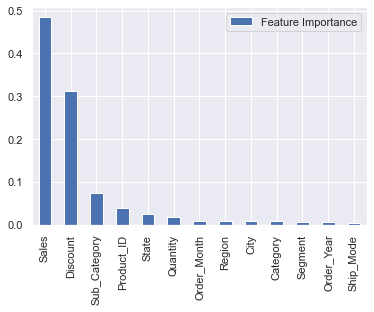

In [91]:
pd.DataFrame(rf.feature_importances_, index = X.columns, 
             columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False).plot(kind = "bar");

- R2 is high. No overfitting. Either permutation importance or feature importance shows the most important predictors are `Sales`, `Discount`, `Sub_Category`, `Product_ID`, which matches the result of mutual information.

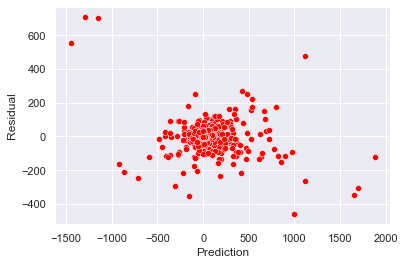

In [92]:
y_pred = rf.predict(X_test)
sns.scatterplot(x = y_pred, y = y_pred - y_test, color = "red");
plt.xlabel("Prediction");
plt.ylabel("Residual");

## HistGradientBoosting

In [93]:
hgb = HistGradientBoostingRegressor(scoring='r2', max_depth=5,random_state=2)
metrics(hgb, X_train, y_train, X_test, y_test)

Train: R2: 0.910, RMSE: 49.957
Test: R2: 0.860, RMSE: 60.029


In [94]:
pi = permutation_importance(hgb, X_test, y_test, scoring="r2", n_repeats=5, n_jobs=-1, random_state=10)
pd.DataFrame({"Permutation Importance mean": np.round(pi.importances_mean,3), 
              "Permutation Importance std": np.round(pi.importances_std,3)}, index = X.columns).sort_values("Permutation Importance mean", ascending = False)

Permutation Importance mean  Permutation Importance std
Sales                               1.659                       0.107
Discount                            1.405                       0.083
Sub_Category                        0.155                       0.021
Product_ID                          0.071                       0.006
State                               0.007                       0.009
Quantity                            0.005                       0.002
Order_Year                          0.003                       0.002
Region                              0.001                       0.000
Ship_Mode                          -0.000                       0.000
Segment                             0.000                       0.000
City                                0.000                       0.001
Category                            0.000                       0.000
Order_Month                         0.000                       0.000

- R2 is lower than random forest, but still a pretty decent result. No overfitting.

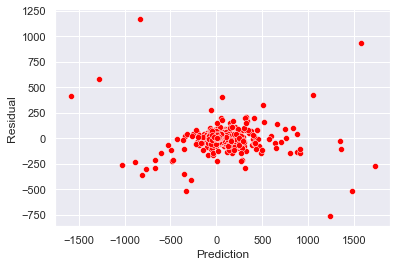

In [95]:
y_pred = hgb.predict(X_test)
sns.scatterplot(x = y_pred, y = y_pred - y_test, color = "red");
plt.xlabel("Prediction");
plt.ylabel("Residual");

# Business Insight
## Market
- South region should be a good starting point to exploit domestic market in the future.
- CA, NY and TX are the most popular destinations of our orders. We may consider building extra distribution centers in these states and placing frequently ordered products here. 
- CA, NY and WA generate the highest profit, while TX generates the highest loss.

## Profit
- Technology category only account for 18.5% of total orders, but generate more than half of total profit, which is a cash cow for our business. The second most profitable category is office supplies.
- Technology is the most profitable category. Furniture is the least profitable category. Labels, paper, envelopes are top 3 most profitable sub categories.
- Though profit increases over years, some products incurred loss. We should review our price strategy - either reduce the discount or increase the sales of these products.
- Staples, staple envelope and easy-staple paper are the most popular products at all times and in all regions. We may procure these products in large amount and get higher discounts from suppliers. 
- Our profit is mainly from consumer sector, which contributes 47% of total profits. Corporate sector contributes 32% and home office only 21%. Besides, consumer sector generates the highest profit in East/ South/ West region and corporate sector generates the highest profit in Central region.We should condudct targeted promotions to major customer sector in each region in the future.

## Customer service
- To ensure high throughput during the peak season between September and December, we could consider hiring seasonal workers to handle ordres.
- The number of days taken to ship is reduced in 2016 - 2017, which is an improvement of order processing.